# GUÍA PASO A PASO DE PCA
http://www.ub.edu/stat/docencia/Mates/ejemploACP.PDF

In [2]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# PCA RESULTADOS FINANCIEROS

1. Abrir el archivo
2. Separar las variables dependientes de las independientes y normalizarlas
3. Construcción de las matrices de varianza y covarianza
4. Cálculo de los valores propios

In [3]:
#Se importan las librerias necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

1.Abrir el archivo

In [4]:
#Se cargan los archivos limpios sin variables respetidas, imputados los datos y sin atípicos

#SIEMPRE USAR EL ARCHIVO TOTALULIMPIO2 QUE ES EL DE LOS DATOS LIMPIOS

total=pd.read_excel("TOTALULIMPIO2.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898,11,1810,2008,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900,3525900,343423.189677,79.846659,912761,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904,11,1810,2008,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411,296411,9406.000000,79.846659,122106,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912,11,1810,2008,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496,1594496,3200.000000,46.000000,366562,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913,11,1741,2008,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200,166200,-2000.000000,79.846659,92868,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459,8,1410,2016,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356,1290356,11182.000000,54.000000,790408,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465,8,1410,2016,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414,3679414,343423.189677,8.000000,1476328,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467,8,1410,2016,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225,15550083,503083.000000,400.000000,7454626,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483,8,1410,2016,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882,1284882,343423.189677,18.000000,835716,421689.0,5.155038e+06,1.717450e+05,1180126.0


2.Separar las variables dependientes de las independientes (RECURSOS HUMANOS) y normalizarlas

In [45]:
variables = ['EXPORTACIONES','VAL_AGREGADO','VENTAS','ESTABLECIMIENTO']

X=total.loc[:,variables].values 

y=total.loc [:, ['ESTABLECIMIENTO']].values 

In [46]:
x_std= StandardScaler().fit_transform(X)

In [47]:
recursosh = pd.DataFrame(data = X, columns = variables).head(10295)
recursosh

,EXPORTACIONES,VAL_AGREGADO,VENTAS,ESTABLECIMIENTO
0,4.996960e+06,912761.0,3460300.0,145898.0
1,4.996960e+06,122106.0,296411.0,145904.0
2,1.946210e+05,366562.0,1597520.0,145912.0
3,4.996960e+06,92868.0,231480.0,145913.0
...,...,...,...,...
10291,4.996960e+06,790408.0,1100444.0,987459.0
10292,4.996960e+06,1476328.0,3300208.0,987465.0
10293,1.608454e+06,7454626.0,15443532.0,987467.0
10294,1.717450e+05,835716.0,1180126.0,987483.0


In [38]:
#No hay datos perdidos pues se esta utilizando el archivo de los datos limpios

recursosh.isnull().sum() # Saber si hay casos con NA
recursosh.dropna(how="all", inplace=True) # Eliminar las observaciones con NA
recursosh.columns

Index(['EXPORTACIONES', 'VAL_AGREGADO', 'VENTAS', 'PERIODO'], dtype='object')

In [48]:
x=recursosh.drop("ESTABLECIMIENTO",axis = 1) #Se elimina la variable ventas pues X=Recursos Humanos
y=recursosh["ESTABLECIMIENTO"]  #Y=Ventas
names=recursosh.columns
X_std= StandardScaler().fit_transform(x)

<Figure size 432x288 with 0 Axes>

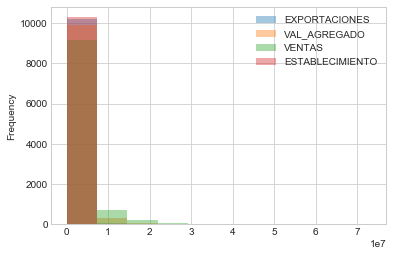

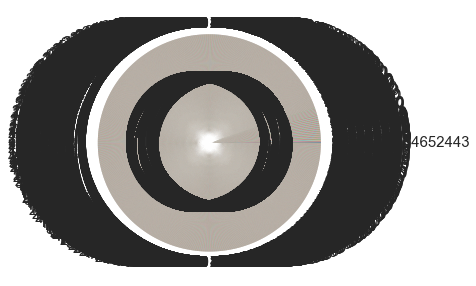

In [12]:
plt.figure("Histograma")
recursosh.plot.hist(alpha=0.4)
plt.figure("Gráfico de pie",figsize=(5,5))
recursosh.VENTAS.value_counts().plot(kind="pie",autopct='%1.1f%%', fontsize=15)
plt.show()

3.Construcción de las matrices de varianza y covarianza 

Para que se pueda realizar el PCA, es necesario que las variables presenten factores comunes. Es decir, que estén muy correlacionadas entre sí. Los coeficientes de la matriz de correlaciones deben ser grandes en valor absoluto. 

# POR FAVOR AYUDA

In [10]:
#INTENTAR EJECUTAR ESTE CÓDIGO

! pip install factor_analyzer

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
#EN CASO DE QUE NO SIRVA LA LINEA ANTERIOR INTENTAR EJECUTAR ESTE CÓDIGO
$ conda install -c desilinguist factor_analyzer

SI NO FUNCIONAN LAS DOS OPCIONES ANTERIORES INTENTAR POR FAVOR DESCARGAR Y EJECUTAR factor_analyzer DESDE ESTE ENLACE https://anaconda.org/desilinguist/factor_analyzer/files

In [53]:
#EN CASO DE FNCIONAR ALGUNA DE LAS TRES OPCIONES ANTERIORES EJECUTAR ESTA LÍNEA

import logging
import warnings

from factor_analyzer import Rotator
from scipy.stats import chi2
from scipy.optimize import minimize

from factor_analyzer.rotator import Rotator
from factor_analyzer.rotator import POSSIBLE_ROTATIONS, OBLIQUE_ROTATIONS

In [75]:
def calculate_kmo(X):

    # calculate the partial correlations
    partial_corr = partial_correlations(X)
    partial_corr = partial_corr.values

    # calcualte the pair-wise correlations
    corr = data.corr()
    corr = corr.values

    # fill matrix diagonals with zeros
    # and square all elements
    np.fill_diagonal(corr, 0)
    np.fill_diagonal(partial_corr, 0)

    partial_corr = partial_corr**2
    corr = corr**2

    # calculate KMO per item
    partial_corr_sum = partial_corr.sum(0)
    corr_sum = corr.sum(0)
    kmo_per_item = corr_sum / (corr_sum + partial_corr_sum)
    kmo_per_item = pd.DataFrame(kmo_per_item,
                                index=X.columns,
                                columns=['KMO'])

    # calculate KMO overall
    corr_sum_total = corr.sum()
    partial_corr_sum_total = partial_corr.sum()
    kmo_total = corr_sum_total / (corr_sum_total + partial_corr_sum_total)
    
    return kmo_per_item, kmo_total

In [83]:
def test_calculate_kmo (): 
  
  expected_overall = 0.81498469767761361 
  
  expected_by_item = pd.DataFrame (X, columns = [ ' KMO ' ], 
  índice = índice) 
  (kmo_by_item, 
  kmo_overall) = calcular_kmo (X) 
  print (calcular_kmo (X) )


0,90 > KMO Muy bueno

0,90 > KMO > 0,80 Bueno

0,80 > KMO > 0,70 Aceptable

0,70 > KMO > 0,60 Mediocre o regular

0,60 > KMO > 0,50 Malo

0,50 > KMO Inaceptable o muy malo3

In [49]:
# Matriz de covarianza

mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

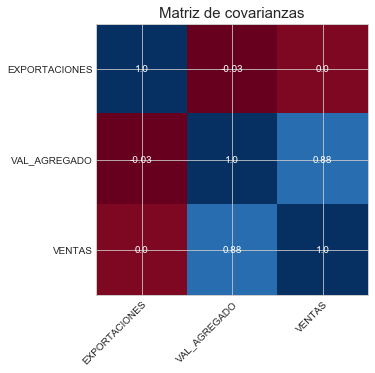

In [50]:
import matplotlib.pyplot as plt
#Gráficar en un mapa de calor las covarianzas

corMat=np.asarray(cov_mat)

fig, ax = plt.subplots(figsize=(5,5)) #Figsize para aumentar el tamaño
im = ax.imshow(corMat,cmap="RdBu")

# Mostrar las etiquetas de las variables
ax.set_xticks(np.arange(len(names)-1))
ax.set_yticks(np.arange(len(names)-1))
# Asignar los nombres a las etiquetas
ax.set_xticklabels(names[:9])
ax.set_yticklabels(names[:9])

# Rotar los nombres
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop para asignar los valores de las correlaciones en el mapa de calor
for i in range(len(names)-1):
    for j in range(len(names)-1):
        text = ax.text(j, i, round(corMat[i, j],2),
                       ha="center", va="center", color="w")

plt.title("Matriz de covarianzas", fontdict={"fontsize":15}) 
# o de correlación si los datos están normalizados
plt.show()

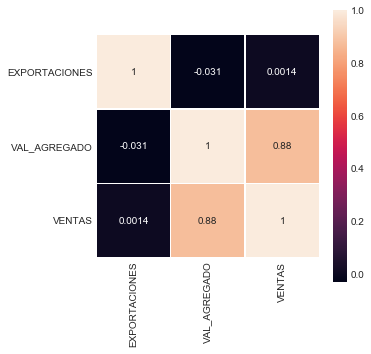

In [51]:
#Otra forma de visualizar la Matriz de covarianzas #ESTA ES MÁS BONITA
plt.subplots(figsize=(5,5))
sns.heatmap(x.corr(), square=True, annot=True, linewidths =0.4)

4.Cálculo de los valores propios

In [52]:
#KAREN da el mismo resultado utilizando CorMat o utilizando x.corr
eigen_value, eigen_vector =np.linalg.eig(x.corr()) 
print("Valores propios \n  %s \n" %eigen_value)
print("Vectores propios \n %s" %eigen_vector)

#LOS VALORES PROPIOS DEBEN SER ORDENADOS DE MAYOR A MENOR PARA PODER ESCOGER LA CANTIDAD DE COMPONENTES OJO....

Valores propios 
  [1.00009717 0.12196995 1.87793287] 

Vectores propios 
 [[ 0.9993798  -0.02598552 -0.02376504]
 [-0.00157012 -0.70708634  0.70712547]
 [ 0.03517896  0.7066496   0.70668861]]


In [53]:
var=[(eigen_value[i]/3)*100 for i in range(len(eigen_value))]
var

[33.336572384565216, 4.065665152985185, 62.597762462449595]

In [54]:
var_cum=[]
for i in range(len(var)):
    var_cum.append(sum(var[:i+1]))
var_cum

[33.336572384565216, 37.4022375375504, 100.0]

Gráfico de la varianza asociada a cada factor. Se utiliza para determinar cuántos factores deben retenerse. Típicamente el gráfico muestra la clara ruptura entre la pronunciada pendiente de los factores más importantes. 

http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/AMult/tema3am.pdf

PARA ESTA GRÁFICA LOS VALORES PROPIOS DEBEN ESTAR ORDENADOS DE MAYOR A MENOR O DE MAYOR A MENOR VARIANZA EXPLICADA

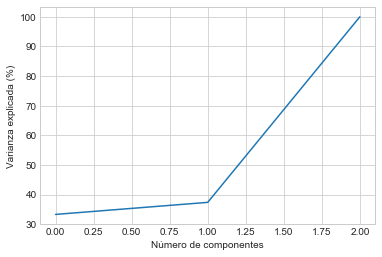

In [23]:
#El nuúmero de componentes esta determinado por el punto donde se encuentra una clara ruptura o punto de inflexión

plt.plot(var_cum,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.show()

#ESTA GRÁFICA ESTA MAL PORQUE LOS VALORES PROPIOS DEBEN ESTAR ORDENADOS DE MAYOR A MENOR

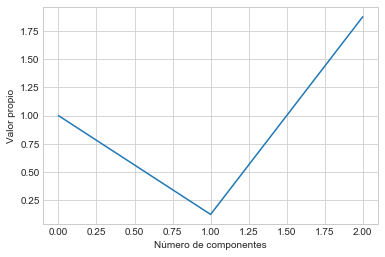

In [24]:
plt.plot(eigen_value,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Valor propio")
plt.show()

#ESTA GRÁFICA ESTA MAL PORQUE LOS VALORES PROPIOS DEBEN ESTAR ORDENADOS DE MAYOR A MENOR

Analizando la gráfica Valor propio vs Número de componentes se toman los dos primeros componentes 

En el caso de Python se toman las componentes 3 Y 1

5.Proyección de los datos

In [ ]:
#Creo que no se pueden proyectar los datos

for name in ('11002090', '1657388', '8600884'):
    plt.scatter(x=Y[y==name,0],y=Y[y==name,1],VENTAS=name)
plt.legend()
plt.show()

In [55]:
M_w=eigen_vector[:,0:2]
Y=X_std.dot(M_w) # Nuevos Y

# PCA

In [56]:
from sklearn.decomposition import PCA

sklearn_PCA= PCA(n_components=2)
Y_1=sklearn_PCA.fit_transform(X_std)

In [57]:
PCArecursosh = pd.DataFrame(data = Y_1, columns = ['RESULTADOS_FINANCIEROS', 'VENTAS'])
PCArecursosh.head(10295)

,RESULTADOS_FINANCIEROS,VENTAS
0,-0.128186,0.396362
1,-0.742689,0.376404
2,-0.451469,-2.112449
3,-0.758665,0.376002
...,...,...
10291,-0.465659,0.381208
10292,-0.003190,0.395005
10293,3.158495,-1.292033
10294,-0.383952,-2.127307


In [58]:
establecimiento=total[['ESTABLECIMIENTO']].head(10295)
establecimiento

,ESTABLECIMIENTO
0,145898
1,145904
2,145912
3,145913
...,...
11635,987459
11636,987465
11637,987467
11638,987483


In [59]:
PCArecursosh.reset_index(drop=True, inplace=True) 
establecimiento.reset_index(drop=True, inplace=True) 
PCA = pd.concat([establecimiento,PCArecursosh], axis=1)
PCA

,ESTABLECIMIENTO,RESULTADOS_FINANCIEROS,VENTAS
0,145898,-0.128186,0.396362
1,145904,-0.742689,0.376404
2,145912,-0.451469,-2.112449
3,145913,-0.758665,0.376002
...,...,...,...
10291,987459,-0.465659,0.381208
10292,987465,-0.003190,0.395005
10293,987467,3.158495,-1.292033
10294,987483,-0.383952,-2.127307


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


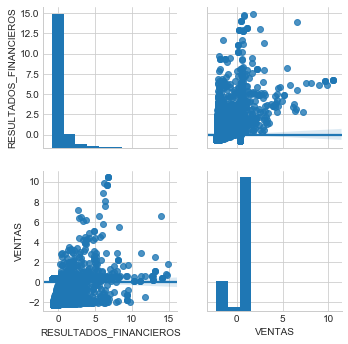

In [60]:
b = sns.pairplot(PCA, vars=["RESULTADOS_FINANCIEROS","VENTAS"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables

In [61]:
print(sklearn_PCA.explained_variance_ratio_) 

[0.62597762 0.33336572]
